In [1]:
#%matplotlib ipympl
import matplotlib.pyplot as plt
from ztfquery import sedm, io
from pymage import panstarrs
from ztfquery import sedm
import matplotlib
import numpy as np
from IPython.core.display import display, HTML
from pymage import panstarrs
import sep
import astrobject.collections.photodiagnostics as photodiag
from astrobject import photometry
import astrobject

from astrobject.utils.tools import flux_to_mag


display(HTML("<style>.container { width:100% !important; }</style>"))

# Get image from PS1 

In [2]:
ra,dec = 11.179, 46.747
p=panstarrs.PS1Target.from_coord(ra,dec)

In [3]:
p.download_catalog
p.download_extended_catalog()
p.download_cutout(load_weight=True)

Created TAP+ (v1.2.1) - Connection:
	Host: vao.stsci.edu
	Use HTTPS: False
	Port: 80
	SSL Port: 443
INFO: Query finished. [astroquery.utils.tap.core]
downloading BytesIO
downloading BytesIO


this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


downloading BytesIO
downloading BytesIO


downloading BytesIO
downloading BytesIO


downloading BytesIO
downloading BytesIO


downloading BytesIO
downloading BytesIO


## Image in each band

In [4]:
rfilter = p.imgcutout["r"]
gfilter = p.imgcutout["g"]
ifilter = p.imgcutout["i"]
zfilter = p.imgcutout["z"]
yfilter = p.imgcutout["y"]

## Show image and weighted image (r-band example)

/home/nicolas/.installs/anaconda3/lib/python3.7/site-packages/astrobject-0.8.6-py3.7.egg/astrobject/utils/mpladdon.py:731: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Text(0.5, 1.0, 'weighted image')

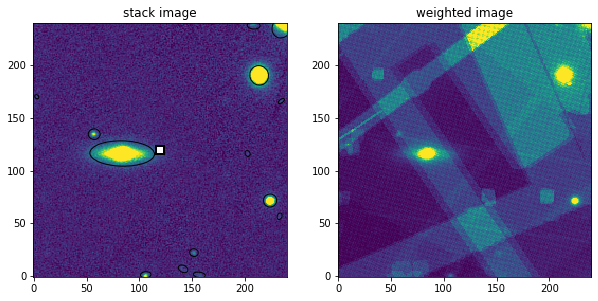

In [5]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
rfilter.show(show_sepobjects=True,logscale=False, ax=ax1)
ax1.set_title('stack image')
rfilter.weightimage.show(show_sepobjects=True, logscale=False, ax=ax2)
ax2.set_title('weighted image')

### Get datas 

In [13]:
rfilter.data

array([[ 3.09758615e-02, -8.43126488e-02,  1.02688456e-01, ...,
        -5.61554670e-02,  2.98174429e-02,  6.43748665e-02],
       [ 1.47920501e-02, -5.64235544e-02, -4.40898657e-02, ...,
         4.19543982e-02, -1.71481884e-02,  2.76597691e-02],
       [-1.04788423e-02,  7.20168829e-02, -6.27126503e-02, ...,
         9.28353405e-02, -2.54625869e-02, -5.44944954e-02],
       ...,
       [-1.77866211e-01, -5.05909491e-02,  3.64059925e-02, ...,
         9.23390259e+00,  1.02728210e+01,  1.07212158e+01],
       [ 1.48166752e-01, -3.40673184e-02,  1.23713112e-01, ...,
         1.50153418e+01,  1.75958191e+01,  1.86118835e+01],
       [ 7.32051373e-02,  1.50543225e-02, -7.61543989e-02, ...,
         2.71625806e+01,  3.36368750e+01,  3.54718140e+01]])

In [14]:
rfilter.weightimage.data

array([[ 7.85078735,  7.63715027,  8.05079224, ...,  7.68293518,
         8.59227112,  8.36682007],
       [ 7.99522095,  8.0155249 ,  8.12204651, ...,  8.33198792,
         7.5975592 ,  7.684729  ],
       [ 8.2779126 ,  8.56287659,  7.91825134, ...,  8.10623108,
         7.40648193,  8.00934692],
       ...,
       [12.17736938, 12.42147949, 12.67206787, ..., 23.86184326,
        27.19112061, 26.97020508],
       [13.09043335, 12.55641846, 12.46986084, ..., 34.7937207 ,
        41.84492676, 43.29113281],
       [12.57106323, 12.85151245, 12.08938965, ..., 68.12657227,
        76.91796387, 79.55242676]])

## Sep datas

In [5]:
sep_val=rfilter.sep_extract(returnobjects=True)

In [19]:
sep_val.data

# 14 ellipse (see figure above)
# flux column referr to the total flux inside the ellipse

id,flux,var,lbda,mjd,bandname,zp,zpsys
str25,float64,float64,float64,float64,str5,object,str2
"156.66793968,1.27564702",9.695808410644531,nan,6214.623038,56041.3157340463,ps1.r,None,ab
"105.96532711,1.41671464",40.72978973388672,nan,6214.623038,56041.3157340463,ps1.r,None,ab
"141.31781714,7.05541163",6.722690582275391,nan,6214.623038,56041.3157340463,ps1.r,None,ab
"151.60294227,22.40625116",16.65838623046875,nan,6214.623038,56041.3157340463,ps1.r,None,ab
"232.67425098,56.75605332",3.541491746902466,nan,6214.623038,56041.3157340463,ps1.r,None,ab
"223.61105282,71.67927785",436.1661682128906,nan,6214.623038,56041.3157340463,ps1.r,None,ab
"83.67413628,116.15519956",3490.56005859375,nan,6214.623038,56041.3157340463,ps1.r,None,ab
"202.42703856,116.15577126",2.5924713611602783,nan,6214.623038,56041.3157340463,ps1.r,None,ab
"57.24220680,134.46618336",55.96964645385742,nan,6214.623038,56041.3157340463,ps1.r,None,ab


### Ellipse values of the ellipses : return x, y, a, b, theta for the sep objects

In [6]:
ellipses_val = sep_val.get_ellipse_values().T

In [7]:
def get_DLR(x_sn, y_sn, x_gal, y_gal, a, b, theta):
    '''
    Computes the DLR from the target position for a galaxy defined
    by x, y coordinates, `a` and `b` semimajor and semiminor axes
    '''
    cxx = np.cos(theta)**2/a**2 + np.sin(theta)**2/b**2
    cyy = np.sin(theta)**2/a**2 + np.cos(theta)**2/b**2
    cxy = 2*np.sin(theta)*np.cos(theta)*(1/a**2 + 1/b**2)
    r_gal = np.sqrt(
        cxx*(x_sn - x_gal)**2 +
        cyy*(y_sn - y_gal)**2 +
        cxy*(x_sn - x_gal)*(y_sn - y_gal)
    )
    return r_gal

In [8]:
x_sn, y_sn = p.imgcutout['r'].coords_to_pixel(ra, dec)

In [9]:
DLR_list = [get_DLR(x_sn, y_sn,
                    ellipses_val[i][0], ellipses_val[i][1],
                    ellipses_val[i][2], ellipses_val[i][3],
                    ellipses_val[i][1])
           for i in range(len(ellipses_val))]

In [10]:
hg_ellipse = ellipses_val[np.argmin(DLR_list)]

In [11]:
bands = list(p.imgcutout.keys())

ps1_zp = {'g': 0.4810,
          'r': 0.6170,
          'i': 0.7520,
          'z': 0.8660,
          'y': 0.9620}

PANSTARRS_INFO = {"g": {"lbda": 4866.457871, "ABmag0": 25.0, "bandname": "ps1.g"},
                  "r": {"lbda": 6214.623038, "ABmag0": 25.0, "bandname": "ps1.r"},
                  "i": {"lbda": 7544.570357, "ABmag0": 25.0, "bandname": "ps1.i"},
                  "z": {"lbda": 8679.482571, "ABmag0": 25.0, "bandname": "ps1.z"},
                  "y": {"lbda": 9633.284241, "ABmag0": 25.0, "bandname": "ps1.y"},
                  "bands": ["ps1.g", "ps1.r", "ps1.i", "ps1.z", "ps1.y"]}

var = {band: p.imgcutout[band].weightimage.data**(-2)
      for band in bands}

hg_count = {band: sep.sum_ellipse(p.imgcutout[band].data,
                                  hg_ellipse[0], hg_ellipse[1],
                                  hg_ellipse[2], hg_ellipse[2],
                                  hg_ellipse[4],
                                  var=var[band])
            for band in bands}

hg_flux = {band: [rfilter.count_to_flux(hg_count[band][0]),
                  rfilter.count_to_flux(hg_count[band][1])]
           for band in bands}

hg_mag = {band: np.array(flux_to_mag(hg_flux[band][0],
                                     hg_flux[band][1],
                                     zp=ps1_zp[band]))
         for band in bands}

In [12]:
phtpt_g = photometry.get_photopoint(hg_flux['g'][0], hg_flux['g'][1]**2,
                                    lbda=PANSTARRS_INFO['g']['lbda'],
                                    bandname=PANSTARRS_INFO['g']['bandname'])

phtpt_i = photometry.get_photopoint(hg_flux['i'][0], hg_flux['i'][1]**2,
                                    lbda=PANSTARRS_INFO['i']['lbda'],
                                    bandname=PANSTARRS_INFO['i']['bandname'])

In [13]:
gm = photodiag.get_massestimator(photopoints=[phtpt_g, phtpt_i])

In [14]:
gm.set_target(astrobject.get_target(zcmb=0.05))

In [15]:
gm.get_estimate()

(11.207104301899971, 0.09795607381512461, 0.09894969022308331)

/home/nicolas/.installs/anaconda3/lib/python3.7/site-packages/astrobject-0.8.6-py3.7.egg/astrobject/utils/mpladdon.py:731: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


{'figure': <Figure size 576x432 with 1 Axes>,
 'ax': <matplotlib.axes._axes.Axes at 0x7ff787d03910>,
 'plot': [(array([0.01073859, 0.01073859, 0.04295436, 0.04832365, 0.15570955,
          0.11812448, 0.24161826, 0.32215768, 0.51545229, 0.83224068,
          0.95036516, 1.21882989, 1.85240667, 2.45913697, 2.6255851 ,
          3.18936104, 3.31285482, 3.76387558, 4.1450955 , 4.09677185,
          3.95717018, 3.46856437, 3.61353532, 2.79740253, 2.48061415,
          2.15308717, 1.53024899, 1.17050624, 0.90204151, 0.61209959,
          0.37048133, 0.27920332, 0.15034025, 0.12349378, 0.11275519,
          0.03221577, 0.01610788, 0.00536929, 0.        , 0.00536929]),
   array([10.84874412, 10.86736854, 10.88599296, 10.90461738, 10.9232418 ,
          10.94186622, 10.96049064, 10.97911506, 10.99773948, 11.0163639 ,
          11.03498832, 11.05361274, 11.07223716, 11.09086158, 11.109486  ,
          11.12811042, 11.14673484, 11.16535926, 11.18398368, 11.2026081 ,
          11.22123252, 11.239

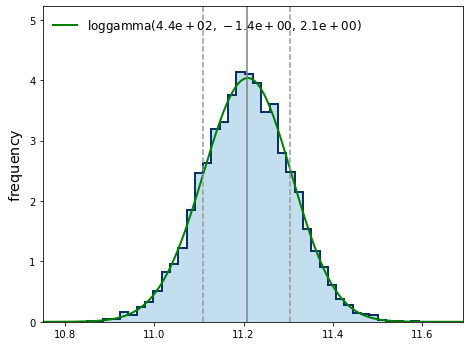

In [17]:
gm.show()

In [39]:
sep_val.get_ellipse_mask(240, 240)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

## 2 ways of displaying ellipses 

(0.0, 240.0)

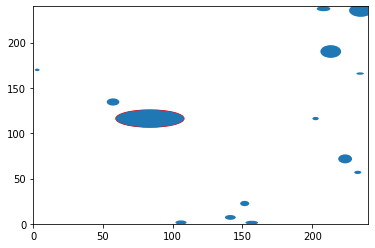

In [18]:
ellipses=sep_val.get_ellipse_values().T

from matplotlib.patches import Ellipse
fig,ax=plt.subplots()
ells = [Ellipse(xy=[ellipses[i,0],ellipses[i,1]],
                width=ellipses[i,2]*4, height=ellipses[i,3]*4,
                angle=ellipses[i,4])
        for i in range(len(ellipses))]
hg_ell = Ellipse(xy=[hg_ellipse[0], hg_ellipse[1]],
                width=hg_ellipse[2]*4, height=hg_ellipse[3]*4,
                angle=hg_ellipse[4], color='red')
for e in ells:
    ax.add_artist(e)
ax.add_patch(hg_ell)
ax.set_xlim(0, 240)
ax.set_ylim(0, 240)

<IPython.core.display.Javascript object>


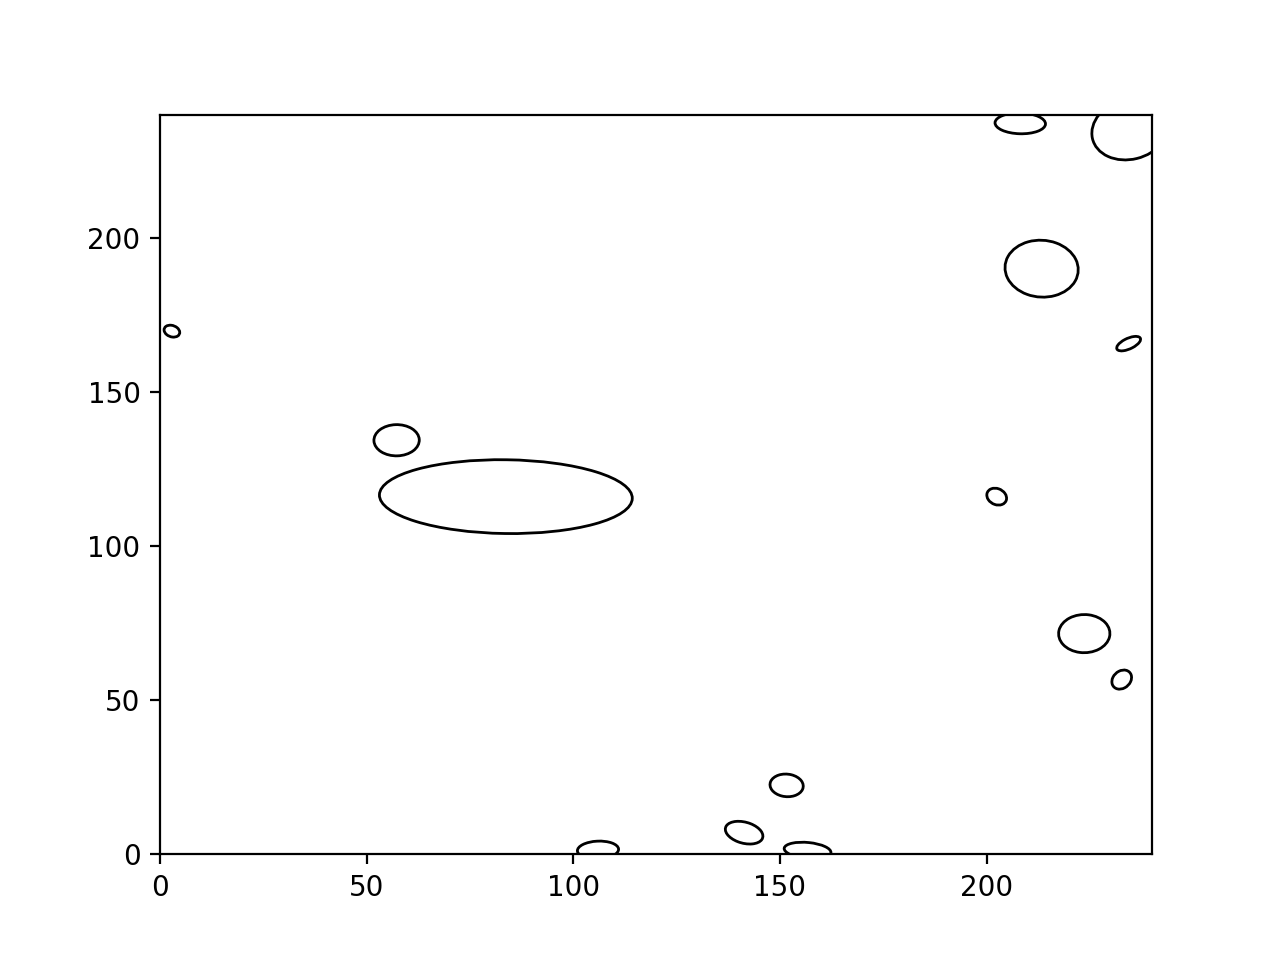

(0, 240)

In [98]:
fig,ax=plt.subplots()
sep.display_ellipses(ax=ax)
ax.set_xlim(0, 240)
ax.set_ylim(0, 240)

## Coordinates (ra dec) of the object to which the sep belong

In [60]:
sep.get_skycoords()

<SkyCoord (ICRS): (ra, dec) in deg
    [(11.17524115, 46.73872903), (11.18039345, 46.73877188),
     (11.17687944, 46.73917375), (11.17579967, 46.74022673),
     (11.16748385, 46.74259392), (11.16844807, 46.74366815),
     (11.18262744, 46.74674891), (11.1706316 , 46.74670654),
     (11.18533326, 46.74801105), (11.16738753, 46.75016466),
     (11.19082121, 46.75052813), (11.16951591, 46.751879  ),
     (11.16710334, 46.75515371), (11.17002626, 46.75521837)]>